In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# GAN

In [ ]:
#from ML_DCGAN import Generator,weights_init,Discriminator
import torch.optim as optim
import torch
import random
import torch.nn as nn
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)
ngpu = 1
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
lr = 0.0002   # Learning rate for optimizers
beta1 = 0.5 # Beta1 hyperparam for Adam optimizers
nc = 3  # Number of channels in the training images. For color images this is 3
nz = 100  # Size of z latent vector (i.e. size of generator input)

Random Seed:  999


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
from ml_dcgan import weights_init,Generator,Discriminator

ModuleNotFoundError: ignored

In [ ]:
netG = Generator(ngpu).to(device)
netG.apply(weights_init)
netD = Discriminator(ngpu).to(device)
netD.apply(weights_init)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [ ]:
# Create the generator
net_Gt = Generator(ngpu).to(device)
net_Dt = Discriminator(ngpu).to(device)
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))
# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    net_Gt = nn.DataParallel(net_Gt, list(range(ngpu)))
    net_Dt = nn.DataParallel(net_Dt, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.02.
net_Gt.apply(weights_init)
net_Dt.apply(weights_init)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

# 匯入 Pretrained model


In [ ]:
import os

os.chdir('/content')
CODE_DIR = 'MLfinal_Manipulation'
if not os.path.exists(CODE_DIR):
  !git clone https://github.com/weihaox/TediGAN.git $CODE_DIR
os.chdir(f'./{CODE_DIR}')
MODEL_DIR = os.path.join('base', 'models', 'pretrain')
os.makedirs(MODEL_DIR, exist_ok=True)

!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

# download pretrained stylegan and encoder
!wget https://mycuhk-my.sharepoint.com/:u:/g/personal/1155082926_link_cuhk_edu_hk/EXqix_JIEgtLl1FXI4uCkr8B5GPaiJyiLXL6cFbdcIKqEA?e=WYesel\&download\=1 -O $MODEL_DIR/styleganinv_ffhq256_encoder.pth  --quiet
!wget https://mycuhk-my.sharepoint.com/:u:/g/personal/1155082926_link_cuhk_edu_hk/EbuzMQ3ZLl1AqvKJzeeBq7IBoQD-C1LfMIC8USlmOMPt3Q?e=CMXn8W\&download\=1 -O $MODEL_DIR/styleganinv_ffhq256_generator.pth  --quiet
!wget https://mycuhk-my.sharepoint.com/:u:/g/personal/1155082926_link_cuhk_edu_hk/EQJUz9DInbxEnp0aomkGGzAB5b3ZZbtsOA-TXct9E4ONqA?e=smtO0T\&download\=1 -O $MODEL_DIR/vgg16.pth  --quiet
!nvidia-smi

Cloning into 'MLfinal_Manipulation'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (262/262), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 262 (delta 103), reused 201 (delta 50), pack-reused 0
Receiving objects: 100% (262/262), 17.67 MiB | 12.79 MiB/s, done.
Resolving deltas: 100% (103/103), done.
     |████████████████████████████████| 64 kB 1.6 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=df53a93c4c037a6563745fd328f8e426463277a77cc652ff719a954df0491403
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-m7ank5y8
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-m7ank5y8
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369108 sha256=98453b56a084300b05883fdc739777f630c0a3492c8221e0838eaca5285a52bd

# 選擇指定的特徵，產生第一張圖片


In [ ]:
# @title Please choose a feature you want to generate:
char_dic = ["Bald","Big_Lips"]

feature = "Attractive" #@param {type:"string"}
#int(input("How much images do you want to generate:"))
total_num = "1"  #@param {type:"string"}
total_num = int(total_num)

In [ ]:
dic = torch.load("/content/drive/MyDrive/checkpoint/dcgan_{}.pth".format(feature), map_location=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'))
net_Gt.load_state_dict(dic['netG'])
net_Dt.load_state_dict(dic['netD'])
optimizerG.load_state_dict(dic['optimizerG'])
optimizerD.load_state_dict(dic['optimizerD'])

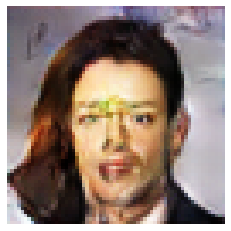

In [ ]:
for i in range(total_num):
  test_noise = torch.randn(1, nz, 1, 1, device=device)

  with torch.no_grad():
    fake = net_Gt(test_noise).detach().cpu()
    img_test = vutils.make_grid(fake, padding=2, normalize=True)

  plt.subplot(1,1,1)
  plt.imshow(np.transpose(img_test,(1,2,0)))
  plt.axis("off")
  #plt.show()
  plt.savefig("/content/MLfinal_Manipulation/base/examples/"+str(i)+".jpg",bbox_inches="tight",pad_inches=0)

In [ ]:
%cd base
# 第一次inversion的setting
model_name = 'styleganinv_ffhq256'
description = 'angry'  #@param {type:"string"}
loss_weight_clip = 1.0  #@param {type:"number"}
learning_rate = 0.01  #@param {type:"number"}
num_iterations = 100  #@param {type:"integer"}
image_path = 'examples/0.jpg' #@param {type:"string"}

/content/MLfinal_Manipulation/base


In [ ]:
# 進行第一次inversion
!python invert.py \
  --model_name={model_name} \
  --mode='man' \
  --image_path={image_path} \
  --description=f'{description}' \
  --learning_rate={learning_rate} \
  --num_iterations={num_iterations} \
  --loss_weight_clip={loss_weight_clip}
  # 結果會存在 /MLfinal_Manipulation/base/results/inversion/test/13_inv.png

100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 60.4MiB/s]
[2022-01-03 13:03:46,020][INFO] Build network for module `generator` in model `styleganinv_ffhq256`.
[2022-01-03 13:03:46,304][INFO] Loading pytorch weights from `models/pretrain/styleganinv_ffhq256_generator.pth`.
[2022-01-03 13:03:46,573][INFO] Successfully loaded!
[2022-01-03 13:03:46,613][INFO] Current `lod` is 0.0.
[2022-01-03 13:03:46,613][INFO] Build network for module `encoder` in model `styleganinv_ffhq256`.
[2022-01-03 13:03:48,073][INFO] Loading pytorch weights from `models/pretrain/styleganinv_ffhq256_encoder.pth`.
[2022-01-03 13:03:50,102][INFO] Successfully loaded!
loss_pix: 0.028, loss_feat: 3321.792, loss_reg: 0.016, loss_clip: 0.677, loss: 0.902: 100% 100/100 [01:16<00:00,  1.31it/s]
save 0 in results/inversion/test


In [ ]:
# 第二次inversion的setting
# image＿path要改成第一次產生的圖片*_inv.png
model_name = 'styleganinv_ffhq256'
description = 'sad'  #@param {type:"string"}
loss_weight_clip = 1.0  #@param {type:"number"}
learning_rate = 0.01  #@param {type:"number"}
num_iterations = 100  #@param {type:"integer"}
image_path = 'results/inversion/test/0_inv.png' #@param {type:"string"}

In [ ]:
# 第二次inversion
!python invert.py \
  --model_name={model_name} \
  --mode='man' \
  --image_path={image_path} \
  --description=f'{description}' \
  --learning_rate={learning_rate} \
  --num_iterations={num_iterations} \
  --loss_weight_clip={loss_weight_clip}

[2022-01-03 07:09:24,984][INFO] Build network for module `generator` in model `styleganinv_ffhq256`.
[2022-01-03 07:09:25,270][INFO] Loading pytorch weights from `models/pretrain/styleganinv_ffhq256_generator.pth`.
[2022-01-03 07:09:25,545][INFO] Successfully loaded!
[2022-01-03 07:09:25,586][INFO] Current `lod` is 0.0.
[2022-01-03 07:09:25,586][INFO] Build network for module `encoder` in model `styleganinv_ffhq256`.
[2022-01-03 07:09:26,934][INFO] Loading pytorch weights from `models/pretrain/styleganinv_ffhq256_encoder.pth`.
[2022-01-03 07:09:28,913][INFO] Successfully loaded!
loss_pix: 0.006, loss_feat: 819.127, loss_reg: 0.012, loss_clip: 0.667, loss: 0.738: 100% 100/100 [01:16<00:00,  1.31it/s]
save 0_inv in results/inversion/test


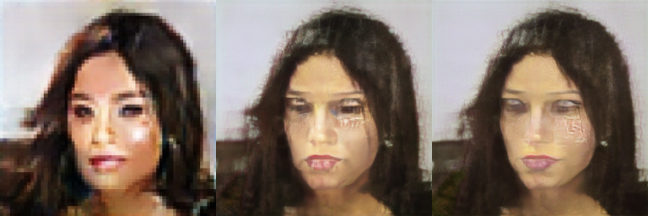

In [ ]:
#@title image you want to show
# 結果都會存在 /MLfinal_Manipulation/base/results/inversion/test
# 第二產生的結果檔名叫做*_inv_inv.png
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
original_image= "results/inversion/test/0_ori.png" #@param {type:"string"}
first_inverst= "results/inversion/test/0_inv.png" #@param {type:"string"}
second_inverse= "results/inversion/test/0_inv_inv.png" #@param {type:"string"}
original = cv2.imread(original_image)
inversion = cv2.imread(first_inverst)
manipulation = cv2.imread(second_inverse)
inversion = cv2.resize(inversion, (216, 216), interpolation=cv2.INTER_AREA)
original = cv2.resize(original, (216, 216), interpolation=cv2.INTER_AREA)
manipulation = cv2.resize(manipulation, (216, 216), interpolation=cv2.INTER_AREA)
result = np.hstack([original, inversion, manipulation])
cv2_imshow(result)